In [ ]:
# подключаем личный диск к блокноту
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os


In [ ]:
base_path = '/content/drive/MyDrive/newML/newMl/'

In [ ]:
arrPneumPath = base_path + 'pneumonia'
arrTubPath =  base_path + 'tuberculosis'
arrCanPath =   base_path + 'сancer'

In [ ]:
def addPath(path):
  paths = []
  for root, dirs, files in os.walk(path):
      if(len(files) == 0):
        continue
      folder = files[0].split('.csv')[0]
      paths.append(os.path.join(path,folder) + '/' + files[0])
  return paths

In [ ]:
arrPneum=addPath(arrPneumPath)
arrTub=addPath(arrTubPath)
arrCan=addPath(arrCanPath)

In [ ]:
arrTub

['/content/drive/MyDrive/newML/newMl/tuberculosis/1.2.392.200036.9116.2.5.1.16.1613468577.1235620439.998304/1.2.392.200036.9116.2.5.1.16.1613468577.1235620439.998304.csv',
 '/content/drive/MyDrive/newML/newMl/tuberculosis/1.2.392.200036.9116.2.5.1.16.1613468577.1282785240.99768/1.2.392.200036.9116.2.5.1.16.1613468577.1282785240.99768.csv',
 '/content/drive/MyDrive/newML/newMl/tuberculosis/1.2.392.200036.9116.2.5.1.16.1613468577.1296700129.318940/1.2.392.200036.9116.2.5.1.16.1613468577.1296700129.318940.csv',
 '/content/drive/MyDrive/newML/newMl/tuberculosis/1.2.392.200036.9116.2.5.1.16.1613468577.1291764935.315084/1.2.392.200036.9116.2.5.1.16.1613468577.1291764935.315084.csv',
 '/content/drive/MyDrive/newML/newMl/tuberculosis/1.2.392.200036.9116.2.5.1.16.1613468577.1300066906.181866/1.2.392.200036.9116.2.5.1.16.1613468577.1300066906.181866.csv',
 '/content/drive/MyDrive/newML/newMl/tuberculosis/1.2.392.200036.9116.2.5.1.16.1613468577.1305260693.817034/1.2.392.200036.9116.2.5.1.16.16134

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from skimage.transform import resize

In [ ]:
# функция дублирования одного слоя на 3
def expand_greyscale_image_channels(grey_pil_image):
    grey_image_arr = np.array(grey_pil_image)
    grey_image_arr = np.expand_dims(grey_image_arr, -1)
    grey_image_arr_3_channel = grey_image_arr.repeat(3, axis=-1)
    return grey_image_arr_3_channel

In [ ]:
foo = None

In [ ]:

def getImages(df):
  images = []
  dx = int(df[4][2]) - int(df[2][2]) + 1
  dy = int(df[5][2]) - int(df[3][2]) + 1
  normalaizedValue = df[0][1]
  # print('normalaizedValue',normalaizedValue)
  for index, row in df.iterrows():
    if(index <= 2):
      continue
    arr = row.values.copy()
    arr.resize(dx, dy)
    for x in range(0, len(arr)):
        for y in range(0, len(arr[0])):
          # print(arr[x,y])
          foo1 = float(arr[x,y]) / float(normalaizedValue.replace(",", "."))
          # print('foo1',foo1)
          arr[x,y] = foo1
    imgT = arr.astype(np.int16)

    imgR = resize(imgT, (64,64))
    imgE = expand_greyscale_image_channels(imgR)
    images.append(imgE)
  return np.asarray(images)

In [ ]:
print(foo)

None


In [ ]:
def getImg(paths):
  images = []
  for item in paths:
    df = pd.read_csv(item,delimiter = ";", header=None)
    img = getImages(df)
    images.append(img)

  imageN = []
  for img in images:
    for it in img:
      imageN.append(it)
  return np.asarray(imageN)
    #imgT = img.astype(np.int16)
    #imgR = resize(imgT, (64,64))
    #imgE = expand_greyscale_image_channels(imgR)

In [ ]:
Pimages = getImg(arrPneum)
Timages = getImg(arrTub)
Cimages = getImg(arrCan)
# arrPneum=addPath(arrPneumPath)
# arrTub=addPath(arrTubPath)
# arrCan=addPath(arrCanPath)

<ipython-input-41-bd51c969f73a>:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(item,delimiter = ";", header=None)


In [ ]:
print(Pimages.shape)
print(Timages.shape)
print(Cimages.shape)

(569, 64, 64, 3)
(520, 64, 64, 3)
(641, 64, 64, 3)


In [ ]:
Xraw = []
Yraw = []
names = ['Pneumonia', 'Tuberculosis', 'Cancer']
lists = [Pimages, Timages, Cimages]
for i in range(0,3):
  images = lists[i]
  label = names[i]

  for img in images:
    Xraw.append(img)
    Yraw.append(label)

In [ ]:
Xraw = np.asarray(Xraw)
Yraw = np.asarray(Yraw)


In [ ]:
Xraw.shape

(1730, 64, 64, 3)

In [ ]:
Yraw.shape

(1730,)

In [ ]:
Yraw

array(['Pneumonia', 'Pneumonia', 'Pneumonia', ..., 'Cancer', 'Cancer',
       'Cancer'], dtype='<U12')

In [ ]:
from sklearn.utils import shuffle
Xz, yz = shuffle(Xraw, Yraw, random_state=0)

In [ ]:
yz

array(['Cancer', 'Pneumonia', 'Tuberculosis', ..., 'Cancer', 'Pneumonia',
       'Tuberculosis'], dtype='<U12')

In [ ]:
Xz.shape

(1730, 64, 64, 3)

In [ ]:
# импортируем необходимые библиотеки
import cv2
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense
# from scikeras.wrappers import KerasClassifier
# from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import numpy as np

In [ ]:
encoder = LabelEncoder()
encoder.fit(yz)


LabelEncoder()

In [ ]:
from keras.src.utils.np_utils import to_categorical


In [ ]:
# преобразуем стобец с болезнью в мультукласовый
encoded_Yc = encoder.transform(yz)
Yz = to_categorical(encoded_Yc)

**RESNET**

In [ ]:
# импортируем все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2
from keras.models import load_model
from sklearn.datasets import load_files
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50 # импортируем готовую модель ResNet50

In [ ]:
img_height,img_width = 64,64 # размер одного изображения
num_classes = 3 # количество классов
#создаем модель исключаем первый уровень свертки  и с размером изображении 64 на 64
base_model = ResNet50(weights= None, include_top=False, input_shape= (img_height,img_width,3))

In [ ]:
# создаем полносвязанную сеть для классификатора
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam
#добавлеем оптимизаторы и функцию потерь
adam = Adam(lr=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#создаем конфигурацию хода обучения сети
IMAGE_SIZE = [64, 64]
BATCH_SIZE = 50
EPOCHS = 60


In [ ]:
# 1730
# 1 384
# 277
# 69

In [ ]:
history = model.fit(Xz[0:1384], Yz[0:1384], batch_size=BATCH_SIZE,validation_data=(Xz[1384:1661], Yz[1384:1661]), epochs=EPOCHS)

Epoch 1/60
28/28 [==============================] - 49s 250ms/step - loss: 1.8907 - accuracy: 0.4733 - val_loss: 1.3759 - val_accuracy: 0.3105
Epoch 2/60
28/28 [==============================] - 2s 71ms/step - loss: 0.8556 - accuracy: 0.7269 - val_loss: 1.3315 - val_accuracy: 0.3105
Epoch 3/60
28/28 [==============================] - 2s 70ms/step - loss: 0.4537 - accuracy: 0.8367 - val_loss: 2.2572 - val_accuracy: 0.3105
Epoch 4/60
28/28 [==============================] - 2s 72ms/step - loss: 0.3304 - accuracy: 0.9039 - val_loss: 3.0775 - val_accuracy: 0.3105
Epoch 5/60
28/28 [==============================] - 2s 71ms/step - loss: 0.3521 - accuracy: 0.9285 - val_loss: 3.5105 - val_accuracy: 0.3105
Epoch 6/60
28/28 [==============================] - 2s 73ms/step - loss: 0.2517 - accuracy: 0.9212 - val_loss: 3.7995 - val_accuracy: 0.3105
Epoch 7/60
28/28 [==============================] - 2s 75ms/step - loss: 0.1425 - accuracy: 0.9559 - val_loss: 3.3131 - val_accuracy: 0.3105
Epoch 8/60


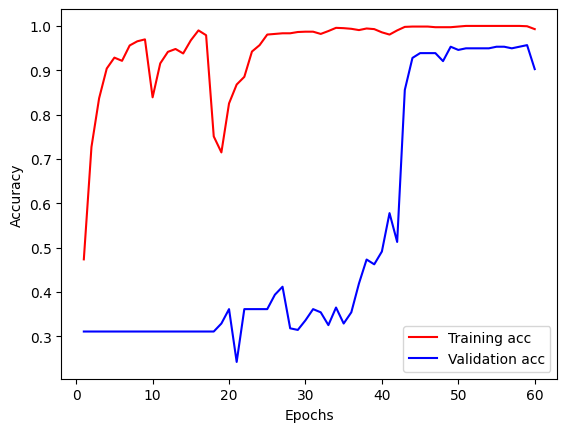

In [ ]:
#выводим график хода обучения
import matplotlib.pyplot as plt
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# вычисляем f1 метрику для тестовой выборки
from sklearn.metrics import f1_score
pred = model.predict(Xz[1661:1730])
trues = Yz[1661:1730]
f1_score(np.argmax(trues, axis=1), np.argmax(pred, axis=1), average=None)

3/3 [==============================] - 3s 391ms/step


array([0.89361702, 0.82608696, 0.84444444])

In [ ]:
from sklearn.metrics import accuracy_score
pred = model.predict(Xz[1661:1730])
trues = Yz[1661:1730]
accuracy_score(np.argmax(trues, axis=1), np.argmax(pred, axis=1))

3/3 [==============================] - 0s 29ms/step


0.855072463768116

In [ ]:
# обучаем модель
history = model.fit(Xz[0:1384], Yz[0:1384], batch_size=BATCH_SIZE,validation_data=(Xz[1384:1661], Yz[1384:1661]), epochs=EPOCHS)


Epoch 1/60
28/28 [==============================] - 4s 157ms/step - loss: 1.3722 - accuracy: 0.7052 - val_loss: 31.1553 - val_accuracy: 0.2852
Epoch 2/60
28/28 [==============================] - 3s 88ms/step - loss: 2.1681 - accuracy: 0.5188 - val_loss: 1547.5474 - val_accuracy: 0.3285
Epoch 3/60
28/28 [==============================] - 2s 79ms/step - loss: 1.2184 - accuracy: 0.5997 - val_loss: 919.0464 - val_accuracy: 0.3610
Epoch 4/60
28/28 [==============================] - 2s 78ms/step - loss: 1.1627 - accuracy: 0.6322 - val_loss: 14.3115 - val_accuracy: 0.2238
Epoch 5/60
28/28 [==============================] - 2s 79ms/step - loss: 0.8946 - accuracy: 0.6532 - val_loss: 163.2319 - val_accuracy: 0.3899
Epoch 6/60
28/28 [==============================] - 2s 82ms/step - loss: 0.8241 - accuracy: 0.6618 - val_loss: 440.5555 - val_accuracy: 0.3610
Epoch 7/60
28/28 [==============================] - 2s 86ms/step - loss: 0.7486 - accuracy: 0.6944 - val_loss: 3.0375 - val_accuracy: 0.3755
E

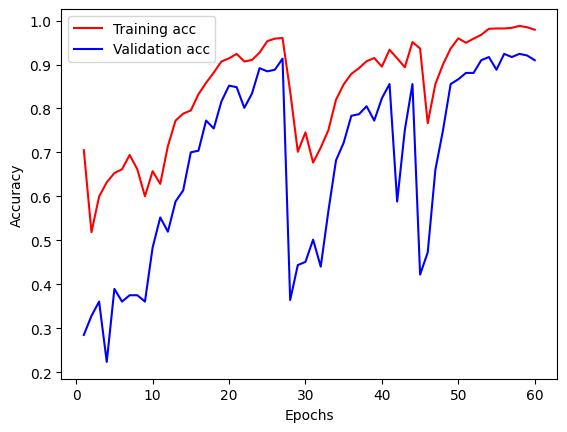

In [ ]:
#выводим график хода обучения
import matplotlib.pyplot as plt
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# вычисляем f1 метрику для тестовой выборки
from sklearn.metrics import f1_score
pred = model.predict(Xz[1661:1730])
trues = Yz[1661:1730]
f1_score(np.argmax(trues, axis=1), np.argmax(pred, axis=1), average=None)

3/3 [==============================] - 4s 322ms/step


array([0.93617021, 0.93333333, 0.91304348])

**VGG16**

In [ ]:
# Конфигурируем процесс обучения нейросети
IMAGE_SIZE = [64, 64]
BATCH_SIZE = 50
EPOCHS = 100

In [ ]:
# импортируем все необходимые библиотеки
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16 # импортируем VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
num_classes = 3 # количество классов
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  # input_shape = (64,64,3) as required by VGG


# создаем полносвязанную сеть для классификатора
x = Flatten()(vgg.output)
x = Dense(num_classes, activation = 'softmax')(x)
model = Model(inputs = vgg.input, outputs = x)
#добавлеем оптимизаторыы и функцию потерь
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
# Обучаем модель
history = model.fit(Xz[0:1384], Yz[0:1384], batch_size=BATCH_SIZE,validation_data=(Xz[1384:1661], Yz[1384:1661]), epochs=EPOCHS)


Epoch 1/100
28/28 [==============================] - 15s 243ms/step - loss: 1.2136 - accuracy: 0.3360 - val_loss: 1.1039 - val_accuracy: 0.3105
Epoch 2/100
28/28 [==============================] - 2s 71ms/step - loss: 1.1835 - accuracy: 0.3353 - val_loss: 1.1060 - val_accuracy: 0.3285
Epoch 3/100
28/28 [==============================] - 2s 71ms/step - loss: 1.1047 - accuracy: 0.3620 - val_loss: 1.0981 - val_accuracy: 0.3285
Epoch 4/100
28/28 [==============================] - 2s 72ms/step - loss: 1.0977 - accuracy: 0.3577 - val_loss: 1.0997 - val_accuracy: 0.3610
Epoch 5/100
28/28 [==============================] - 2s 71ms/step - loss: 1.0973 - accuracy: 0.3750 - val_loss: 1.1000 - val_accuracy: 0.3610
Epoch 6/100
28/28 [==============================] - 2s 75ms/step - loss: 1.0963 - accuracy: 0.3714 - val_loss: 1.1040 - val_accuracy: 0.3610
Epoch 7/100
28/28 [==============================] - 2s 82ms/step - loss: 1.0995 - accuracy: 0.3562 - val_loss: 1.1106 - val_accuracy: 0.3610
Epoc

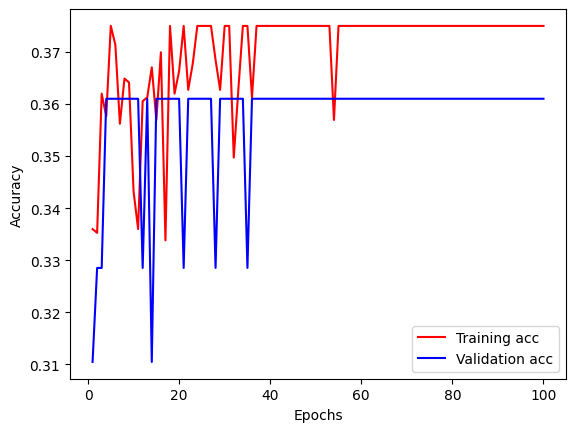

In [ ]:
# Создаем график процесса обучения
import matplotlib.pyplot as plt
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# вычисляем f1 метрику для тестовой выборки
from sklearn.metrics import f1_score
pred = model.predict(Xz[1661:1730])
trues = Yz[1661:1730]
print('f1 score for test sample')
f1_score(np.argmax(trues, axis=1), np.argmax(pred, axis=1), average=None)

3/3 [==============================] - 2s 283ms/step
f1 score for test sample


array([0.48351648, 0.        , 0.        ])

In [ ]:
from sklearn.metrics import accuracy_score
pred = model.predict(Xz[1661:1730])
trues = Yz[1661:1730]
accuracy_score(np.argmax(trues, axis=1), np.argmax(pred, axis=1))

3/3 [==============================] - 0s 17ms/step


0.3188405797101449

**Использование предобученнорй сети**

In [ ]:
# model.save('/contentmy_model.h5')


In [ ]:
# загуржаем готовую сеть
new_model = tf.keras.models.load_model('my_model.h5')


In [ ]:
#f1 метрика на тестовой выборке
from sklearn.metrics import f1_score
pred = new_model.predict(new_X[4500:5934])
trues = dummy_y[4500:5934]
f1_score(np.argmax(trues, axis=1), np.argmax(pred, axis=1), average=None)

array([0.88709677, 0.82632541, 0.86655113])

In [ ]:
#accuracy метрика на обучающей выборке
loss, acc = new_model.evaluate(new_X[0:4500], dummy_y[0:4500], verbose=2)
print("Restored model, learning accuracy: {:5.2f}%".format(100 * acc))


141/141 - 2s - loss: 0.1552 - accuracy: 0.9136 - 2s/epoch - 17ms/step
Restored model, learning accuracy: 91.36%


In [ ]:
#accuracy метрика на тестовой выборке
loss, acc = new_model.evaluate(new_X[5400:5934], dummy_y[5400:5934], verbose=2)
print("Restored model, test accuracy: {:5.2f}%".format(100 * acc))


17/17 - 1s - loss: 2.0152 - accuracy: 0.8371 - 746ms/epoch - 44ms/step
Restored model, test accuracy: 83.71%


In [ ]:
#f1 метрика на валидационной выборке
loss, acc = new_model.evaluate(new_X[4500:5934], dummy_y[4500:5934], verbose=2)
print("Restored model, validation accuracy: {:5.2f}%".format(100 * acc))

45/45 - 1s - loss: 1.8091 - accuracy: 0.8556 - 801ms/epoch - 18ms/step
Restored model, validation accuracy: 85.56%
